In [85]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from testCases import *
from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward
from public_tests import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialize parameters

+ LINEAR -> RELU -> LINEAR ->  SIGMOID
+ Random initialization for the weight matrices: `np.random.randn(d0, d1, ..., dn) * 0.01` 
+ Zero initialization for the biases: `np.zeros(shape))`

In [86]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    # YOUR CODE ENDS HERE
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [87]:
parameters = initialize_parameters(3,2,1)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

initialize_parameters_test(initialize_parameters)

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]
 All tests passed.


# L-layer Neural Network

- The model's structure is *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. I.e., it has $L-1$ layers using a ReLU activation function followed by an output layer with a sigmoid activation function.
- Use random initialization for the weight matrices. Use `np.random.randn(d0, d1, ..., dn) * 0.01`.
- Use zeros initialization for the biases. Use `np.zeros(shape)`.
- You'll store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`. For example, the `layer_dims` for last week's Planar Data classification model would have been [2,4,1]: There were two inputs, one hidden layer with 4 hidden units, and an output layer with 1 output unit. This means `W1`'s shape was (4,2), `b1` was (4,1), `W2` was (1,4) and `b2` was (1,1). Now you will generalize this to $L$ layers! 
- Here is the implementation for $L=1$ (one layer neural network). It should inspire you to implement the general case (L-layer neural network).
```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
        parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

In [88]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        #(≈ 2 lines of code)
        # parameters['W' + str(l)] = ...
        # parameters['b' + str(l)] = ...
        # YOUR CODE STARTS HERE
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        # YOUR CODE ENDS HERE
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [89]:
parameters = initialize_parameters_deep([5,4,3])

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

initialize_parameters_deep_test(initialize_parameters_deep)

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]
 All tests passed.


# Forward propagation module

## Linear Forward

Basic functions to reuse later: 

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$$

where $A^{[0]} = X$.

In [90]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    #(≈ 1 line of code)
    # Z = ...
    # YOUR CODE STARTS HERE
    Z, cache = (np.dot(W, A) + b), (A, W, b)
    
    # YOUR CODE ENDS HERE
    
    return Z, cache

In [91]:
t_A, t_W, t_b = linear_forward_test_case()
t_Z, t_linear_cache = linear_forward(t_A, t_W, t_b)
print("Z = " + str(t_Z))

linear_forward_test(linear_forward)

Z = [[ 3.26295337 -1.23429987]]
 All tests passed.


## Linear-Activation Forward 

We use two activation functions:

+ **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$ - implemented in the `sigmoid` function.
+ **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$ - implemented in the `relu` function.

They can be used as follows:

```python
    A, activation_cache = sigmoid(Z)
    A, activation_cache = relu(Z)
```

In [92]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        #(≈ 2 lines of code)
        # Z, linear_cache = ...
        # A, activation_cache = ...
        # YOUR CODE STARTS HERE
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
        # YOUR CODE ENDS HERE
    
    elif activation == "relu":
        #(≈ 2 lines of code)
        # Z, linear_cache = ...
        # A, activation_cache = ...
        # YOUR CODE STARTS HERE
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
        # YOUR CODE ENDS HERE
    cache = (linear_cache, activation_cache)

    return A, cache

In [93]:
t_A_prev, t_W, t_b = linear_activation_forward_test_case()

t_A, t_linear_activation_cache = linear_activation_forward(t_A_prev, t_W, t_b, activation = "sigmoid")
print("With sigmoid: A = " + str(t_A))

t_A, t_linear_activation_cache = linear_activation_forward(t_A_prev, t_W, t_b, activation = "relu")
print("With ReLU: A = " + str(t_A))

linear_activation_forward_test(linear_activation_forward)

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]
 All tests passed.


# L-Layer Model

Creating a function that replicates the previous one (`linear_activation_forward` with RELU) $L-1$ times, then follows that with one `linear_activation_forward` with SIGMOID.

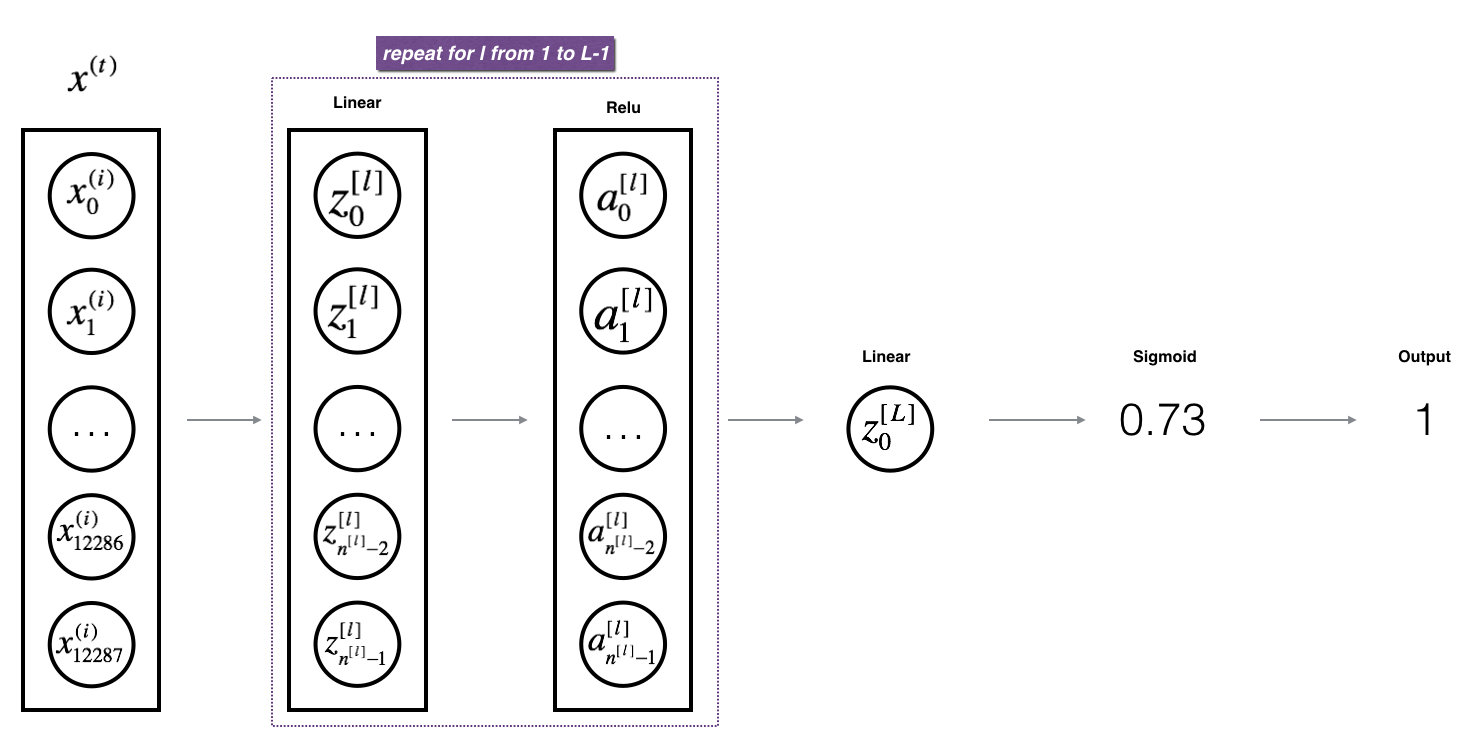 

```python
    AL, caches = L_model_forward(X, parameters)
```

```python
    AL, caches = L_model_forward(X, parameters)
```

In [94]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- activation value from the output (last) layer
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    # The for loop starts at 1 because layer 0 is the input
    for l in range(1, L):
        A_prev = A 
        #(≈ 2 lines of code)
        # A, cache = ...
        # caches ...
        # YOUR CODE STARTS HERE
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        A, cache = linear_activation_forward(A_prev, W, b, activation = 'relu')
        caches.append(cache)
        
        # YOUR CODE ENDS HERE
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    #(≈ 2 lines of code)
    # AL, cache = ...
    # caches ...
    # YOUR CODE STARTS HERE
    W = parameters['W' + str(L)]
    b = parameters['b' + str(L)]
    AL, cache = linear_activation_forward(A, W, b, activation = 'sigmoid')
    caches.append(cache)
    
    # YOUR CODE ENDS HERE
          
    return AL, caches

In [95]:
t_X, t_parameters = L_model_forward_test_case_2hidden()
t_AL, t_caches = L_model_forward(t_X, t_parameters)

print("AL = " + str(t_AL))

L_model_forward_test(L_model_forward)

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
 All tests passed.


# Cost Function 

$$ J = - \frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))\tag{7}$$

```python
    cost = compute_cost(AL, Y)
```

In [96]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    # (≈ 1 lines of code)
    # cost = ...
    # YOUR CODE STARTS HERE
    loss = np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T)
    cost = -1/m * np.sum(loss)
    
    # YOUR CODE ENDS HERE
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    
    return cost

In [97]:
t_Y, t_AL = compute_cost_test_case()
t_cost = compute_cost(t_AL, t_Y)

print("Cost: " + str(t_cost))

compute_cost_test(compute_cost)

Cost: 0.2797765635793422
 All tests passed.


# Backward Propagation Module

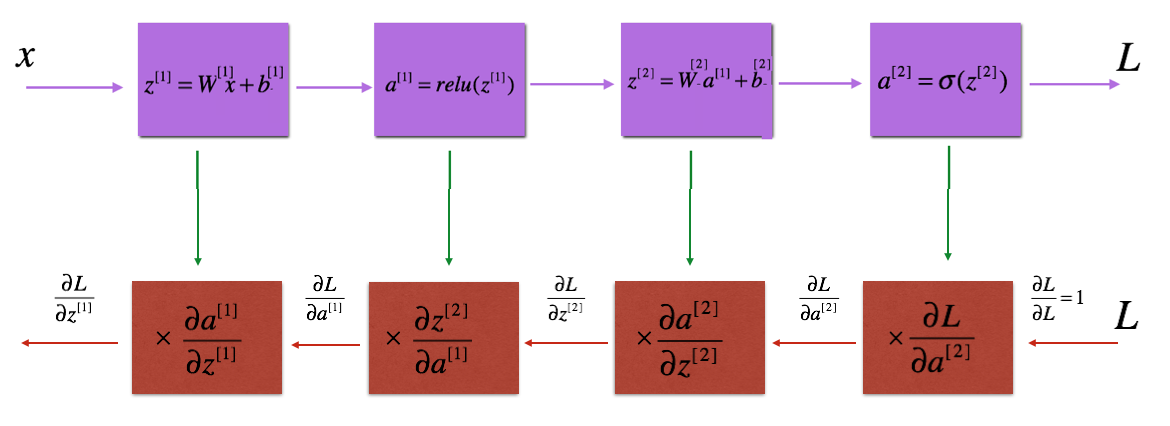

In [98]:
A = np.array([[1, 2], [3, 4]])

print('axis=1 and keepdims=True')
print(np.sum(A, axis=1, keepdims=True))
print('axis=1 and keepdims=False')
print(np.sum(A, axis=1, keepdims=False))
print('axis=0 and keepdims=True')
print(np.sum(A, axis=0, keepdims=True))
print('axis=0 and keepdims=False')
print(np.sum(A, axis=0, keepdims=False))

axis=1 and keepdims=True
[[3]
 [7]]
axis=1 and keepdims=False
[3 7]
axis=0 and keepdims=True
[[4 6]]
axis=0 and keepdims=False
[4 6]


## Linear backward

The linear part for layer $l$ computes: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

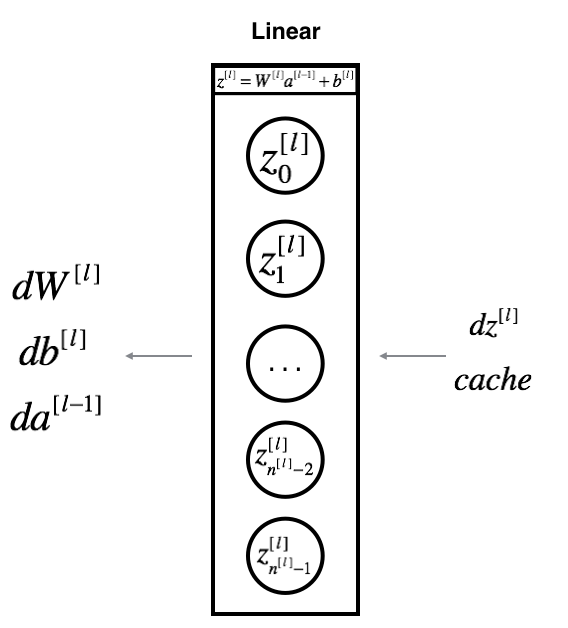

$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]}$$

```python
    dZ, linear_cache = linear_backward(dZ, linear_cache)
```

In [99]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    # dW = ...
    # db = ... sum by the rows of dZ with keepdims=True
    # dA_prev = ...
    # YOUR CODE STARTS HERE
    dW = 1/m * np.dot(dZ, A_prev.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    # YOUR CODE ENDS HERE
    
    return dA_prev, dW, db

In [100]:
t_dZ, t_linear_cache = linear_backward_test_case()
t_dA_prev, t_dW, t_db = linear_backward(t_dZ, t_linear_cache)

print("dA_prev: " + str(t_dA_prev))
print("dW: " + str(t_dW))
print("db: " + str(t_db))

linear_backward_test(linear_backward)

dA_prev: [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW: [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db: [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]
 All tests passed.


## Linear Activation Backward

Next, create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**.

```python
    dA_prev_temp, dW_temp, db_temp = linear_backward(dZ, cache)
```

```python
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dA, cache, activation = "relu")
```

```python
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dA, cache, activation = "sigmoid")
```

The provided `sigmoid_backward` and `relu_backward` functions compute: 

$$ dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$



In [101]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        #(≈ 2 lines of code)
        # dZ =  ...
        # dA_prev, dW, db =  ...
        # YOUR CODE STARTS HERE
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
        # YOUR CODE ENDS HERE
        
    elif activation == "sigmoid":
        #(≈ 2 lines of code)
        # dZ =  ...
        # dA_prev, dW, db =  ...
        # YOUR CODE STARTS HERE
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
        # YOUR CODE ENDS HERE
    
    return dA_prev, dW, db

In [102]:
t_dAL, t_linear_activation_cache = linear_activation_backward_test_case()

t_dA_prev, t_dW, t_db = linear_activation_backward(t_dAL, t_linear_activation_cache, activation = "sigmoid")
print("With sigmoid: dA_prev = " + str(t_dA_prev))
print("With sigmoid: dW = " + str(t_dW))
print("With sigmoid: db = " + str(t_db))

t_dA_prev, t_dW, t_db = linear_activation_backward(t_dAL, t_linear_activation_cache, activation = "relu")
print("With relu: dA_prev = " + str(t_dA_prev))
print("With relu: dW = " + str(t_dW))
print("With relu: db = " + str(t_db))

linear_activation_backward_test(linear_activation_backward)

With sigmoid: dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
With sigmoid: dW = [[ 0.10266786  0.09778551 -0.01968084]]
With sigmoid: db = [[-0.05729622]]
With relu: dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
With relu: dW = [[ 0.44513824  0.37371418 -0.10478989]]
With relu: db = [[-0.20837892]]
 All tests passed.


## L-Model Backward

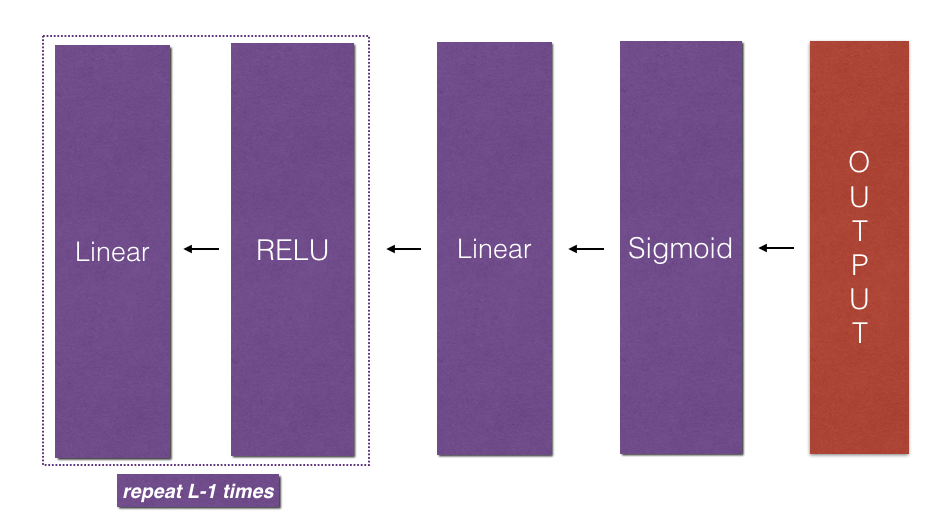

```python
    grads = L_model_backward(AL, Y, caches)
```

The derivative of cost for the $l^{th}$ layer, with respect to AL is:

```python
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
```



The gradients can be stored in the `grads` dictionary, as follows:

```python
    grads["dW" + str(l)] = dWl
    grads["db" + str(l)] = dbl
    grads["dA" + str(l-1)] = dAl
```

In [103]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    #(1 line of code)
    # dAL = ...
    # YOUR CODE STARTS HERE
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # YOUR CODE ENDS HERE
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    #(approx. 5 lines)
    # current_cache = ...
    # dA_prev_temp, dW_temp, db_temp = ...
    # grads["dA" + str(L-1)] = ...
    # grads["dW" + str(L)] = ...
    # grads["db" + str(L)] = ...
    # YOUR CODE STARTS HERE
    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, activation = 'sigmoid')
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp
    
    # YOUR CODE ENDS HERE
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        #(approx. 5 lines)
        # current_cache = ...
        # dA_prev_temp, dW_temp, db_temp = ...
        # grads["dA" + str(l)] = ...
        # grads["dW" + str(l + 1)] = ...
        # grads["db" + str(l + 1)] = ...
        # YOUR CODE STARTS HERE
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l+1)] = dW_temp
        grads["db" + str(l+1)] = db_temp
        
        # YOUR CODE ENDS HERE

    return grads

In [104]:
t_AL, t_Y_assess, t_caches = L_model_backward_test_case()
grads = L_model_backward(t_AL, t_Y_assess, t_caches)

print("dA0 = " + str(grads['dA0']))
print("dA1 = " + str(grads['dA1']))
print("dW1 = " + str(grads['dW1']))
print("dW2 = " + str(grads['dW2']))
print("db1 = " + str(grads['db1']))
print("db2 = " + str(grads['db2']))

L_model_backward_test(L_model_backward)

dA0 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]
dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
dW2 = [[-0.39202432 -0.13325855 -0.04601089]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
db2 = [[0.15187861]]
 All tests passed.


## Update Parameters 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]}$$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary.



In [105]:
# GRADED FUNCTION: update_parameters

def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    params -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    parameters = params.copy()
    gradients = grads.copy()
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    #(≈ 2 lines of code)
    for l in range(L):
        # parameters["W" + str(l+1)] = ...
        # parameters["b" + str(l+1)] = ...
        # YOUR CODE STARTS HERE
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * gradients["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * gradients["db" + str(l+1)]

        
        # YOUR CODE ENDS HERE
    return parameters

In [106]:
t_parameters, grads = update_parameters_test_case()
t_parameters = update_parameters(t_parameters, grads, 0.1)

print ("W1 = "+ str(t_parameters["W1"]))
print ("b1 = "+ str(t_parameters["b1"]))
print ("W2 = "+ str(t_parameters["W2"]))
print ("b2 = "+ str(t_parameters["b2"]))

update_parameters_test(update_parameters)

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]
 All tests passed.
